# Bollywood Movie Dialogue Analysis

## Project Overview

In this project, I aim to analyze the dialogue content of the top-grossing Bollywood movies over the last five years from 2019 to 2023. I will extract dialogue from subtitle files, clean and preprocess the text, and generate word clouds to visualize the most common words and themes.


In [144]:
# Top Bollywood movies data from 2019 to 2023
movies_data = {
    "2023": [
        {"title": "Pathaan", "earnings": "₹1000 crore", "rank": 1},
        {"title": "Jawan", "earnings": "₹950 crore", "rank": 2},
        {"title": "Gadar 2", "earnings": "₹800 crore", "rank": 3},
    ],
    "2022": [
        {"title": "Brahmastra", "earnings": "₹400 crore", "rank": 1},
        {"title": "Drishyam 2", "earnings": "₹300 crore", "rank": 2},
        {"title": "Bhool Bhulaiyaa 2", "earnings": "₹275 crore", "rank": 3},
    ],
    "2021": [
        {"title": "Sooryavanshi", "earnings": "₹290 crore", "rank": 1},
        {"title": "83", "earnings": "₹250 crore", "rank": 2},
        {"title": "Antim", "earnings": "₹200 crore", "rank": 3},
    ],
    "2020": [
        {"title": "Tanhaji", "earnings": "₹365 crore", "rank": 1},
        {"title": "Baaghi 3", "earnings": "₹200 crore", "rank": 2},
        {"title": "Street Dancer 3D", "earnings": "₹150 crore", "rank": 3},
    ],
    "2019": [
        {"title": "War", "earnings": "₹475 crore", "rank": 1},
        {"title": "Kabir Singh", "earnings": "₹380 crore", "rank": 2},
        {"title": "Uri: The Surgical Strike", "earnings": "₹350 crore", "rank": 3},
    ]
}

## Step 1: Extracting Dialogue from Subtitle Files

I begin by extracting dialogue from `.srt` subtitle files. These files contain timestamped text, so I clean them to remove timestamps and keep only the dialogue content. The cleaned dialogue text will be stored for each movie.


In [145]:
import re

def extract_dialogue_from_srt(file_path):
    """
    Extracts dialogue text from an SRT file, removing timestamps and metadata.

    Args:
    - file_path (str): The path to the SRT file.

    Returns:
    - str: The cleaned dialogue text from the SRT file.
    """
    with open(file_path, "r", encoding="utf-8") as file:
        content = file.read()

    # Remove timestamps and metadata using regex
    # This regex matches timestamps like "00:01:15,400 --> 00:01:18,600" and removes them
    content = re.sub(r'\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}', '', content)
    
    # Remove all numeric lines (usually subtitle numbers)
    content = re.sub(r'\d+\n', '', content)
    
    # Remove empty lines
    content = re.sub(r'\n+', '\n', content).strip()

    return content


# Storing cleaned text for all movies
movies_subtitles = {
    "Pathaan (2023)": extract_dialogue_from_srt(r"subtitles\Pathaan.2023.HINDI.EXTENDED.WEBRip.AMZN.en.srt"),
    "Jawan (2023)": extract_dialogue_from_srt(r"subtitles\Jawan.2023.1080p.NF.WEB-DL.DDP5.1.H.264.srt"),
    "Gadar 2 (2023)": extract_dialogue_from_srt(r"subtitles\Gadar 2 (2023) HDRip.srt"),
    "Brahmastra (2022)": extract_dialogue_from_srt(r"subtitles\┬áBrahmastra 1 (2022) TRUE WEB-DL -┬á1080p┬á-┬áAVC - (DD+5.1 - 192Kbps) [Tam + Tel + Hin + Mal + Kan] - 4GB - ESub.srt"),
    "Drishyam 2 (2022)": extract_dialogue_from_srt(r"subtitles\Drishyam.2.2022.1080p.AMZN.WEB-DL.DDP5.1.H.264-Telly.srt"),
    "Bhool Bhulaiyaa 2 (2022)": extract_dialogue_from_srt(r"subtitles\Drishyam.2.2022.1080p.AMZN.WEB-DL.DDP5.1.H.264-Telly.srt"),
    "Sooryavanshi (2021)": extract_dialogue_from_srt(r"subtitles\Sooryavanshi (2021) Hindi - x264 - WEB- HDRip - ESub.srt"),
    "83 (2021)": extract_dialogue_from_srt(r"subtitles\Sooryavanshi (2021) Hindi - x264 - WEB- HDRip - ESub.srt"),
    "Antim (2021)": extract_dialogue_from_srt(r"subtitles\Antim. The Final Truth (2021) Hindi TRUE WEB-DL.srt"),
    "Tanhaji (2020)": extract_dialogue_from_srt(r"subtitles\Tanhaji The Unsung Warrior (2020).Hindi - HQ DVDScr - x264 - 700MB.srt"),
    "Baaghi 3 (2020)": extract_dialogue_from_srt(r"subtitles\BAAGHI 3 (2020) Hindi┬á- AVC - WEB - HDRip - ESub.srt"),
    "Street Dancer 3D (2020)": extract_dialogue_from_srt(r"subtitles\Street Dancer 3D (2020) Hindi HDRip - AAC - Web-DL - ESub.srt"),
    "War (2019)": extract_dialogue_from_srt(r"subtitles\WAR (2019) Hindi Proper True Web-DL - ESub.srt"),
    "Kabir Singh (2019)": extract_dialogue_from_srt(r"subtitles\www.TamilMV.bid - KABIR SINGH (2019) Hindi Proper HDRip - 720p - x264 - 1.4GB - ESub.srt"),
    "Uri: The Surgical Strike (2019)": extract_dialogue_from_srt(r"subtitles\URI The Surgical Strike (2019) Hindi Proper HDRip - 700MB - x264 - MP3.srt"),
                                                    
}

# Print a sample from one movie
print(movies_subtitles["Antim (2021)"][:500])  # Display the first 500 characters

"Every rural home in
India has the same story."
"Farmers sell their land,"
"and do farming on their
own land for someone else."
"Or guard it."
"Or leave the village
and head for the city."
"This story is about
Dutta Pehelwan (wrestler),"
"and his son Rahul."
The bloody watchman's asleep!
Wake him up!
Coming, sir!
Watch out on the other side.
You're too close to the gate.
Stop. Stop. Stop.
The gate was swinging...
What have you done?
Beat him.
Rahul, that Shinder builder
is thrashing your father!


## Step 2: Text Preprocessing

After extracting the dialogue, I clean the text by:
- Converting all text to lowercase.
- Removing special characters, numbers, and unnecessary punctuation.
- Removing common stop words and character names that are not relevant to the analysis.
- Applying lemmatization to reduce words to their base form (e.g., "knows", "knowing" → "know").

This ensures that the text is ready for further analysis.


In [146]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Define your custom stop words
custom_stop_words = set([
    "sir", "madam", "english", "hindi", "will", "come", "go", "yes", "no", 
    "okay", "vihaan", "khalid", "kabir", "abu", "jalal", "let", "see", "rubai", "jim", "pathaan", "raktbeej", 
    "maam", "chuckles", "hmm", "brahmstra", "brahmnsh", "astra","dev", "bilal", "dont", "going", "theres", "hes",
    "know", "ill", "always", "im", "youre", "us", "we", "preeti", "vikram", "shivaji", "shiva",
    "isha", "tara", "singh", "rathore", "jeetey", "sahej", "siya", "riyaaz", "ria", "rahul", "rahulya",
    "usmani", "azad", "colonel", "amrita","vijay", "one", "ilyasi", "shes", "thats", "ronnie", "ive", "naina", "rizwan",
    "groan", "grunt", "music", "want", "say", "ruhi", "well", "wont", "tell", "dint", "youi", "ii",
    "ithe", "let", "saurabh", "whats", "sikka", "ahmed", "uday"
])

# Add NLTK's built-in stop words to your custom list
custom_stop_words.update(stopwords.words('english'))

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(text, stop_words):
    """
    Cleans the text by converting to lowercase, removing special characters,
    filtering out stop words, and applying lemmatization.

    Args:
    - text (str): The input text to be cleaned.
    - stop_words (set): A set of words to remove from the text.

    Returns:
    - str: The cleaned text.
    """
    # Convert text to lowercase
    text = text.lower()
    
    # Remove all special characters, numbers, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Split the text into words
    words = text.split()
    
    # Remove stop words and apply lemmatization
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    # Join the words back into a single string
    cleaned_text = ' '.join(cleaned_words)
    
    return cleaned_text

# Clean the subtitles for all movies
movies_subtitles_cleaned = {movie: clean_text(dialogue, custom_stop_words) for movie, dialogue in movies_subtitles.items()}


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanje\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanje\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Step 3: Creating a Document-Term Matrix Using TF-IDF

I use the TF-IDF (Term Frequency-Inverse Document Frequency) method to identify the most important words in the dialogue for each movie. The TF-IDF score helps highlight words that are frequent in a particular movie but less common across all movies, giving us insight into unique themes.
## Step 4: Generating Word Clouds for Visualization

Word clouds provide a visual representation of the most frequent words in each movie’s dialogue. Larger words indicate higher frequency. By generating word clouds for each movie, I can quickly identify dominant themes, character interactions, and recurring topics.


                                      ask      away      body       boy  \
Pathaan (2023)                   0.050593  0.060712  0.048879  0.000000   
Jawan (2023)                     0.109453  0.131344  0.044060  0.046607   
Gadar 2 (2023)                   0.016294  0.059746  0.000000  0.075165   
Brahmastra (2022)                0.056529  0.028265  0.011378  0.020059   
Drishyam 2 (2022)                0.062950  0.040059  0.345550  0.109657   
Bhool Bhulaiyaa 2 (2022)         0.062950  0.040059  0.345550  0.109657   
Sooryavanshi (2021)              0.030948  0.061896  0.018687  0.008236   
83 (2021)                        0.030948  0.061896  0.018687  0.008236   
Antim (2021)                     0.025767  0.057975  0.023338  0.096004   
Tanhaji (2020)                   0.027482  0.027482  0.049783  0.014628   
Baaghi 3 (2020)                  0.026708  0.073447  0.000000  0.028432   
Street Dancer 3D (2020)          0.031943  0.041069  0.011021  0.106870   
War (2019)               

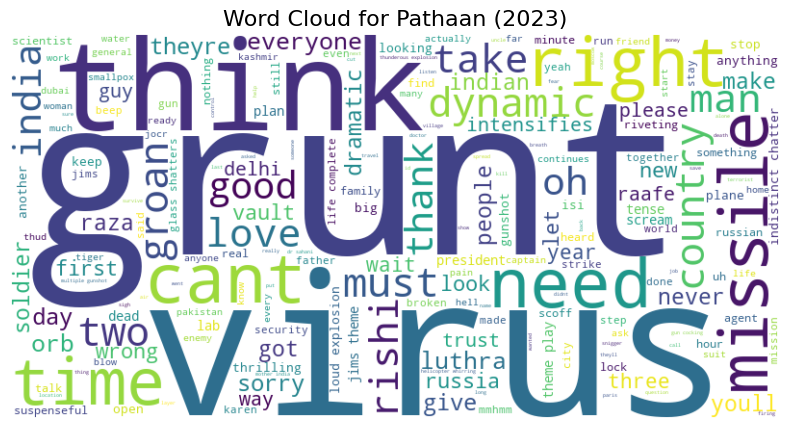

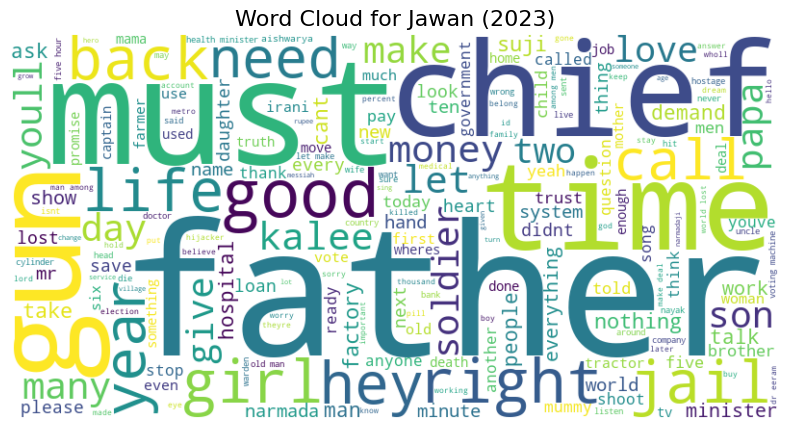

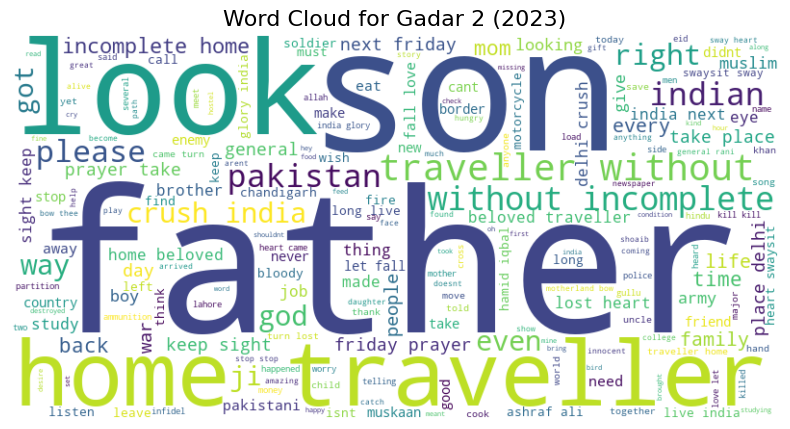

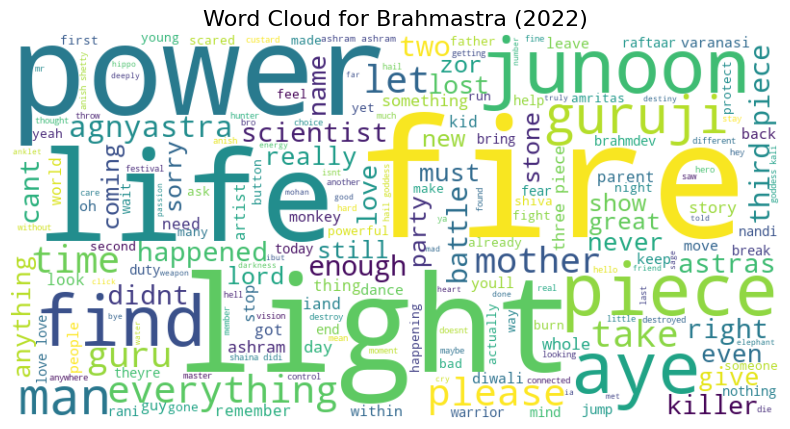

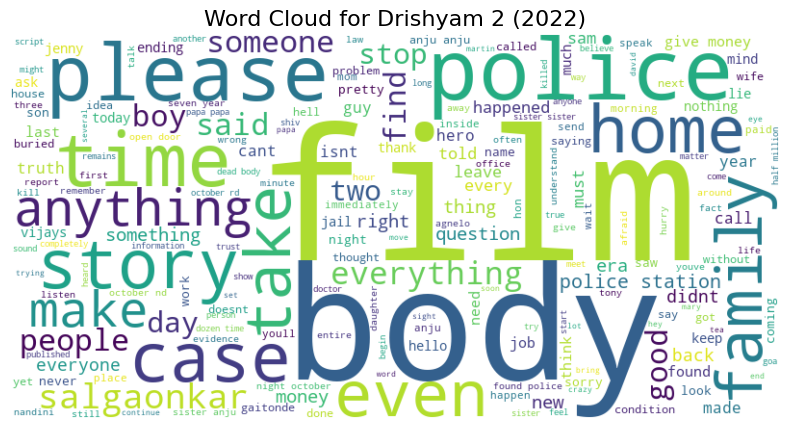

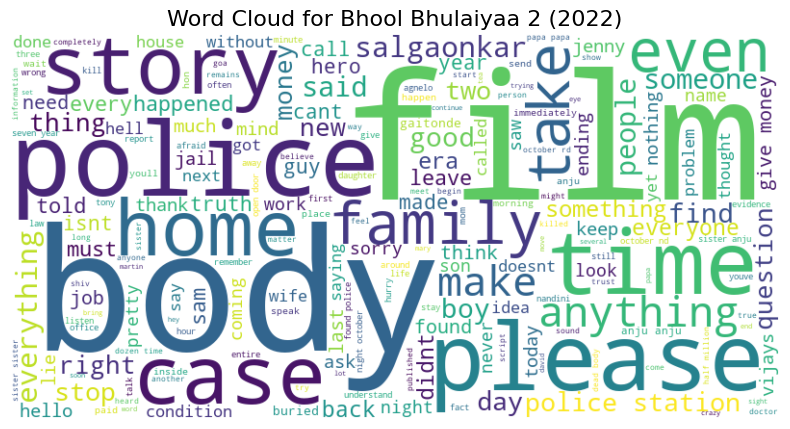

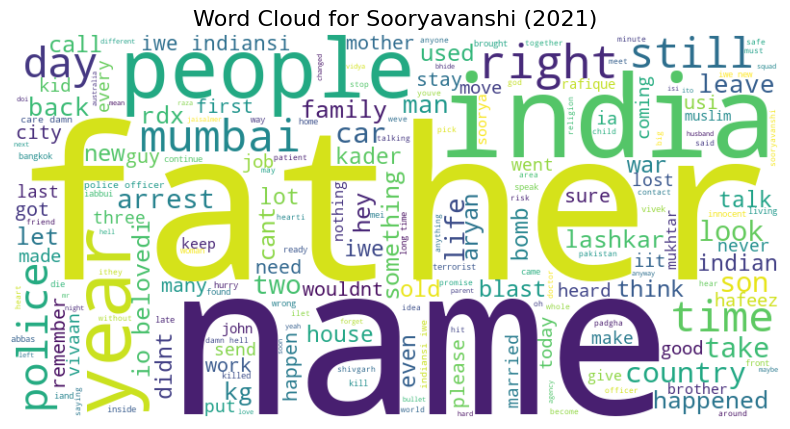

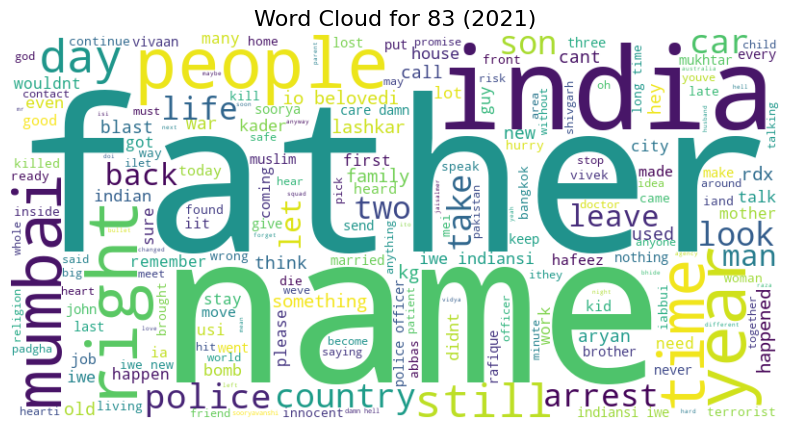

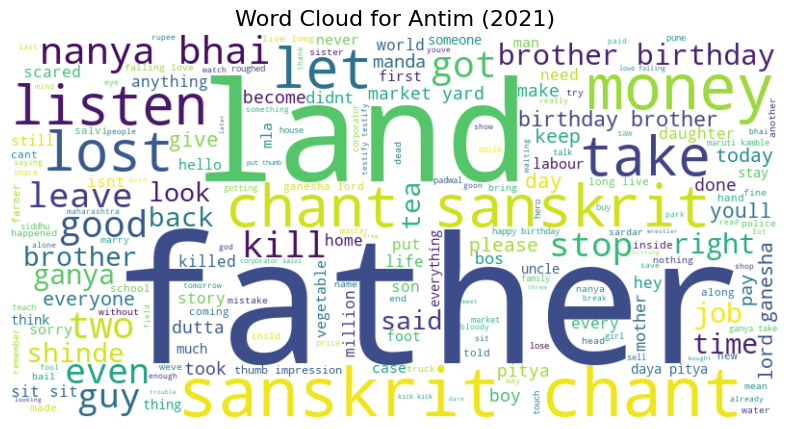

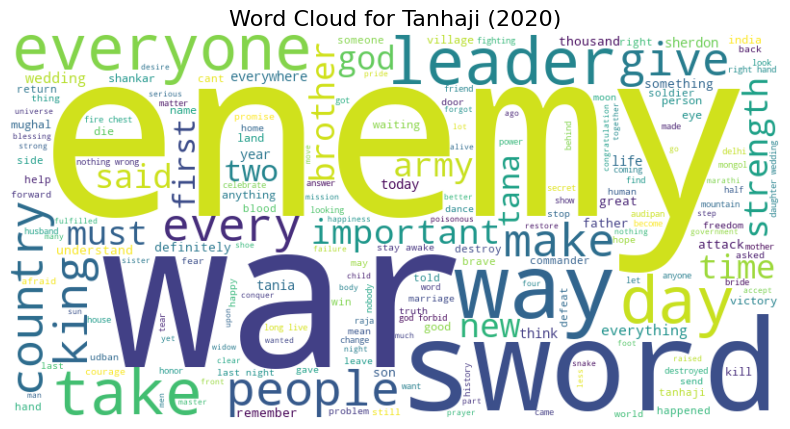

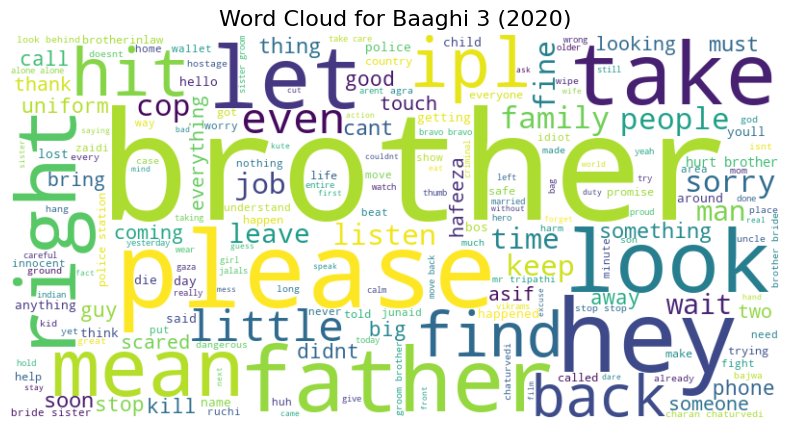

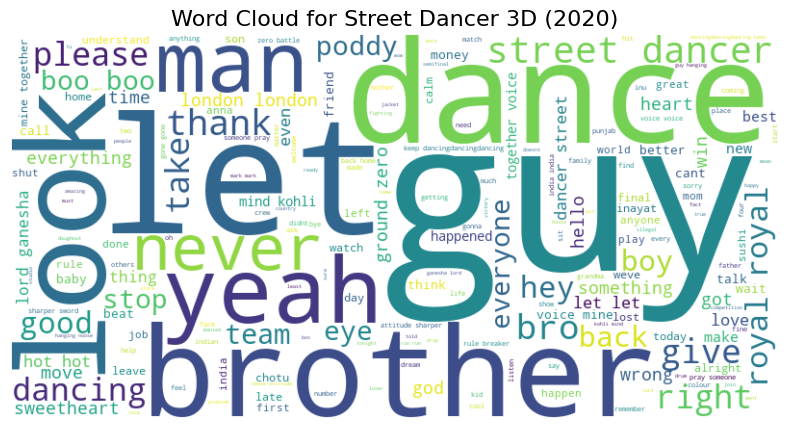

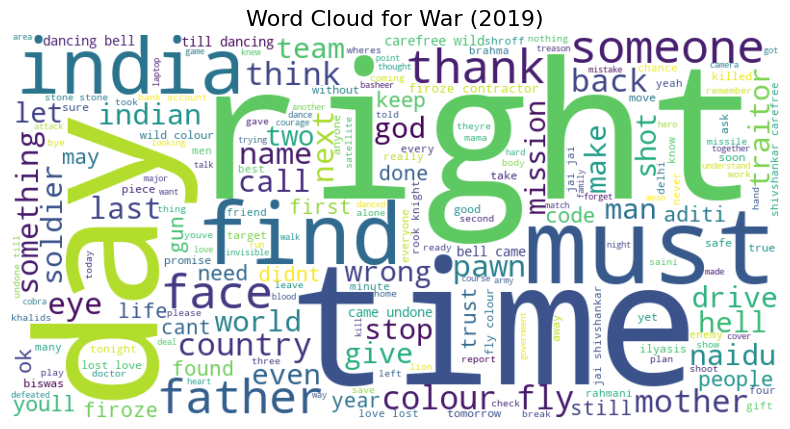

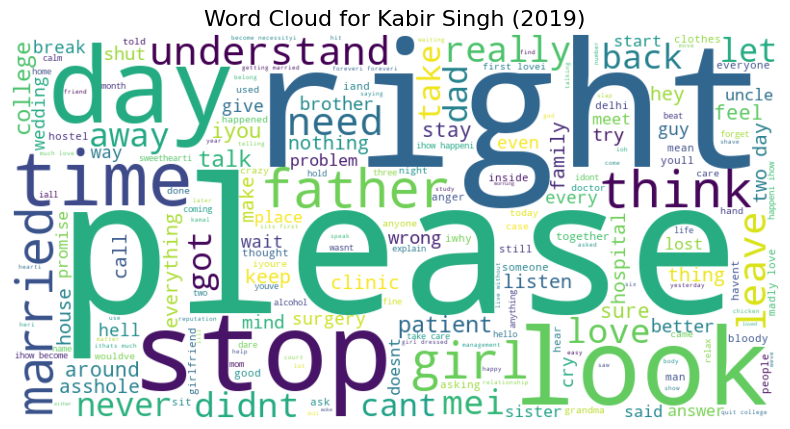

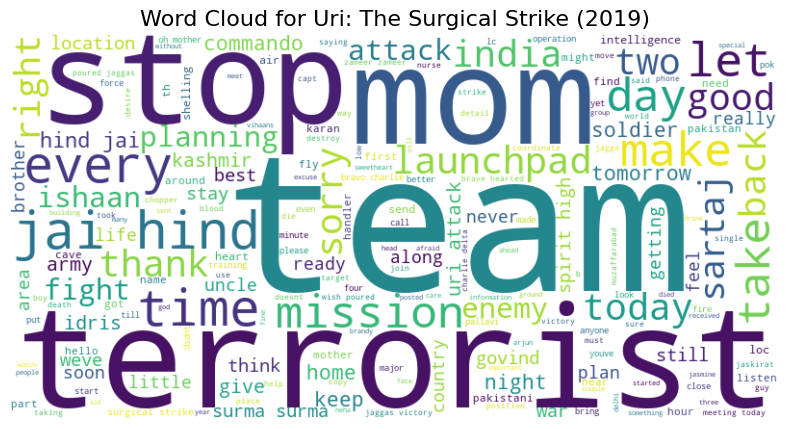

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Prepare the corpus
corpus = list(movies_subtitles_cleaned.values())

# Initialize the vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)

# Create the document-term matrix
X = vectorizer.fit_transform(corpus)

# Get the feature names (words)
words = vectorizer.get_feature_names_out()

# Convert the matrix to a pandas DataFrame for better readability
df = pd.DataFrame(X.toarray(), index=movies_subtitles_cleaned.keys(), columns=words)
print(df)

# Generate word clouds for each movie
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

for movie, dialogue in movies_subtitles_cleaned.items():
    generate_word_cloud(dialogue, f"Word Cloud for {movie}")


## Step 5: Generating a Word Cloud for All Movies Combined

In this step, I combine the cleaned dialogue texts from all the movies into a single text corpus. This allows me to generate a word cloud that visualizes the most frequently occurring words across all the movies together.

### Why Combine All the Texts?

By merging the texts from all movies, I can gain insights into the overall dominant themes and words present across multiple movies. This helps identify common trends or frequently mentioned concepts in Bollywood blockbusters.

### Steps Taken:
1. **Combine the Texts**: I first merge the cleaned dialogue texts of all the movies into a single string.
2. **Generate the Word Cloud**: I then create a word cloud based on the combined text, where larger words indicate higher frequency.
3. **Visualize the Word Cloud**: The word cloud is plotted to display the common words across all movies.

The resulting word cloud gives a big-picture view of the most frequently used words and concepts across the entire set of movies.


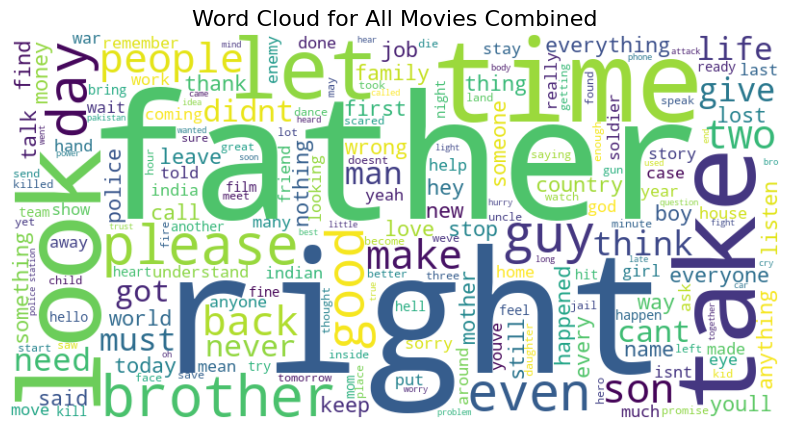

In [148]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the cleaned dialogue texts into a single string
combined_text = ' '.join(movies_subtitles_cleaned.values())

# Generate the word cloud for the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for All Movies Combined", fontsize=16)
plt.axis('off')  # Hide axes
plt.show()


## Results and Conclusion

The analysis revealed that certain words and themes are more prevalent in specific movies. For example, male oriented words appear most frequently like father, brother, son. It might be because most of the movies have male lead characters. One can get a hang of the theme of the movie by looking at wordcloud. E.g. terrorist, team, attack appear in the analysis of Uri movie. 

In the future, I can extend this analysis by including more movies or applying advanced NLP techniques to dive deeper into sentiment and theme analysis. Also, it can be used to ascertain what kind of content has become more popular amongst the audience over the years.
